
# Trapezoidal method based on mean and standard deviation

##  import bibliotek

In [1]:
import datetime as dt
from datetime import datetime
from typing import Tuple, List
import random
import warnings

import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from copy import deepcopy

from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py import discover_bpmn_inductive

warnings.filterwarnings("ignore")

from trapezoidal_method import TrapezoidMethod
import data_preparation as dp
import time

### Załadowanie pliku formatu .xes

In [2]:
log = xes_importer.apply('logs/exercise6.xes')

parsing log, completed traces ::   0%|          | 0/132 [00:00<?, ?it/s]

### Przetworzenie logów do pd.Dataframe

In [3]:
df = log_converter.apply(log, variant=log_converter.Variants.TO_DATA_FRAME)

### Podgląd logow znajdujących się w załadowanym pliku

In [4]:
df.head()

,org:resource,time:timestamp,concept:name,lifecycle:transition,case:concept:name
0,Call Centre Agent,2005-12-31 23:00:00+00:00,check if sufficient information is available,start,0
1,Call Centre Agent,2006-01-13 23:00:00+00:00,check if sufficient information is available,complete,0
2,Call Centre Agent,2006-01-13 23:00:00+00:00,register claim,start,0
3,Call Centre Agent,2008-01-29 23:00:00+00:00,register claim,complete,0
4,Claims handler,2008-01-29 23:00:00+00:00,determine likelihood of claim,start,0


In [5]:
print(df.groupby(['lifecycle:transition'])['lifecycle:transition'].count())

lifecycle:transition
complete    821
start       821
Name: lifecycle:transition, dtype: int64


### Zamiana logów na format zawierający star_timestamp oraz complete_timestamp

In [6]:
df = dp.prepare_logs(df=df, status='lifecycle:transition', timestamp='time:timestamp',status_cols=df['lifecycle:transition'].unique())
df.head()

,org:resource,concept:name,case:concept:name,start_timestamp,complete_timestamp
0,Call Centre Agent,check if sufficient information is available,0,2005-12-31 23:00:00+00:00,2006-01-13 23:00:00+00:00
1,Call Centre Agent,check if sufficient information is available,1,2005-12-31 23:00:00+00:00,2006-03-07 23:00:00+00:00
2,Call Centre Agent,check if sufficient information is available,10,2006-03-30 23:00:00+00:00,2006-04-09 23:00:00+00:00
3,Call Centre Agent,check if sufficient information is available,100,2008-07-26 23:00:00+00:00,2008-09-16 23:00:00+00:00
4,Call Centre Agent,check if sufficient information is available,101,2007-11-13 23:00:00+00:00,2008-01-19 23:00:00+00:00


In [7]:
Texercise6 = TrapezoidMethod(logs=df, 
                             case_id_column_name='case:concept:name', 
                             task_column_name='concept:name', 
                             instance_column_name='org:resource',
                             start_timestamp_column_name='start_timestamp', 
                             complete_timestamp_column_name='complete_timestamp')


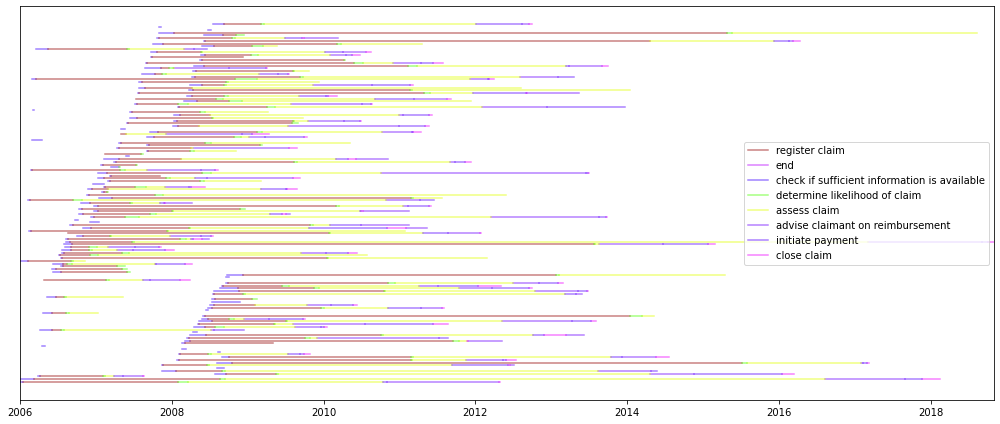

In [8]:
Texercise6.plot_all_tasks()

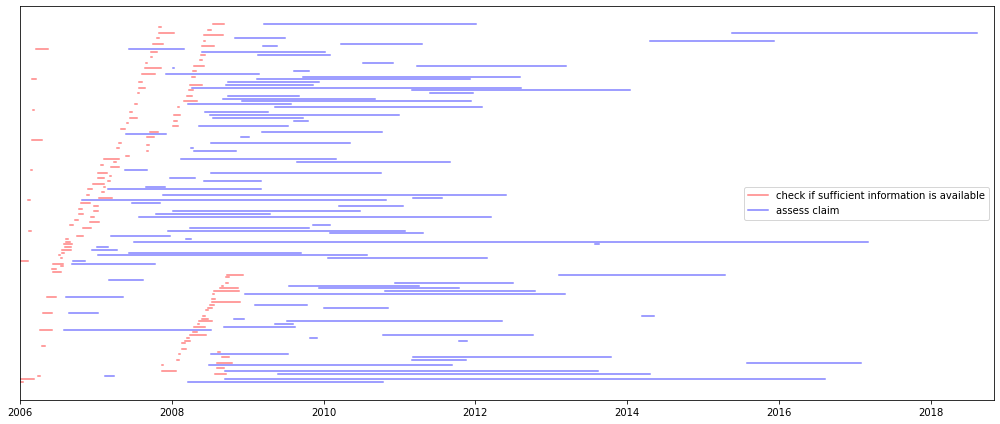

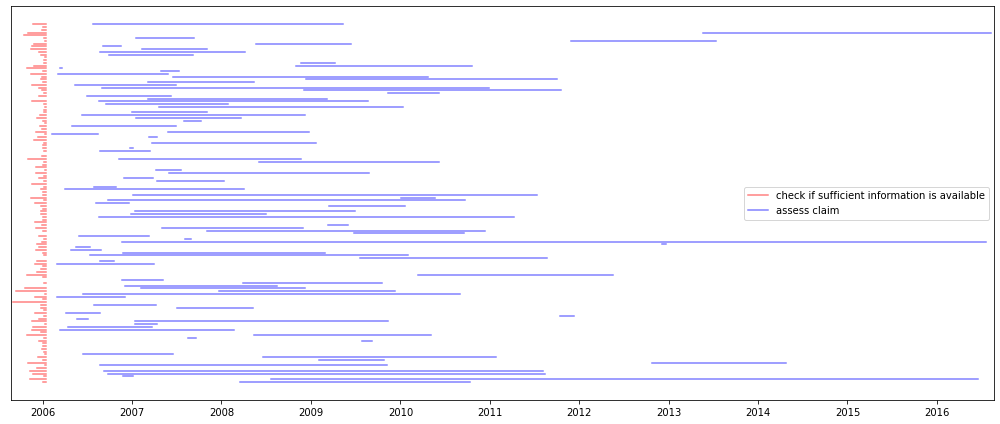

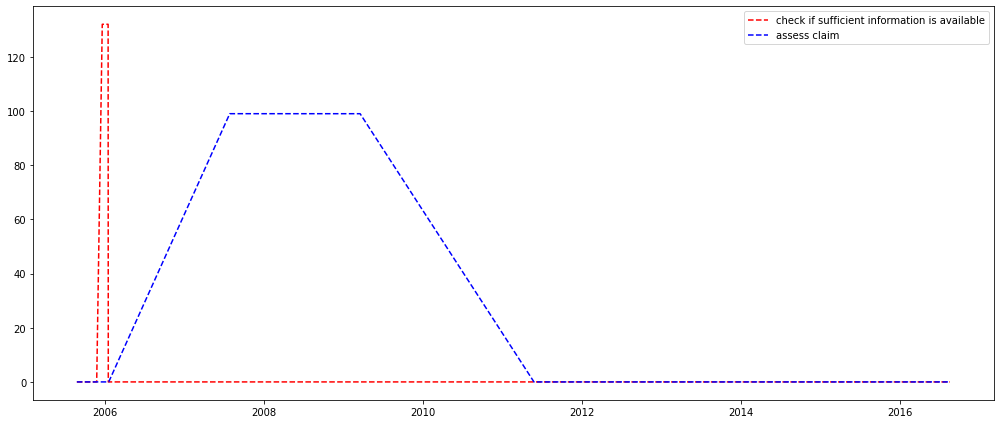

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
check if sufficient information is available area: 13169.18 
assess claim area: 314986.14 
splot area: 0.0 

splot/task1: 0 % 
splot/task2: 0 % 



['meets', 'before']

In [9]:
Texercise6.core_metod(first_task=Texercise6.list_of_tasks[0],
                      second_task=Texercise6.list_of_tasks[4],
#                       instance='Call Centre Agent',
                      plot_results=True,
                      plot_steps=True,
                      print_results=True)

In [10]:
tasks = ['determine likelihood of claim', 'assess claim', 'advise claimant on reimbursement', 'initiate payment', 'close claim']
for i in range(len(tasks)):
    for j in range(i + 1, len(tasks)):
        print('possible relations: ', 
              Texercise6.core_metod(first_task=tasks[j],
                                    second_task=tasks[i],
                                    instance='Claims handler',
    #                                 plot_results=True,
    #                                 plot_steps=True,
                                    print_results=True))

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
determine likelihood of claim area: 8829.26 
assess claim area: 242507.97 
splot area: 0.0 

splot/task1: 0 % 
splot/task2: 0 % 

possible relations:  ['meets', 'before']
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
determine likelihood of claim area: 7724.49 
advise claimant on reimbursement area: 150486.54 
splot area: 0.0 

splot/task1: 0 % 
splot/task2: 0 % 

possible relations:  ['meets', 'before']
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
determine likelihood of claim area: 7665.39 
initiate payment area: 141278.59 
splot area: 0.0 

splot/task1: 0 % 
splot/task2: 0 % 

possible relations:  ['meets', 'before']
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
determine likelihood of claim area: 7592.31 
close claim area: 127167.1 
splot area: 0.0 

splot/ta

# Test random logs generator

In [11]:
from logs_generator import generate_logs
generated_logs = generate_logs('overlaps')

Generate relation 'A' overlaps 'B' 
99.0%

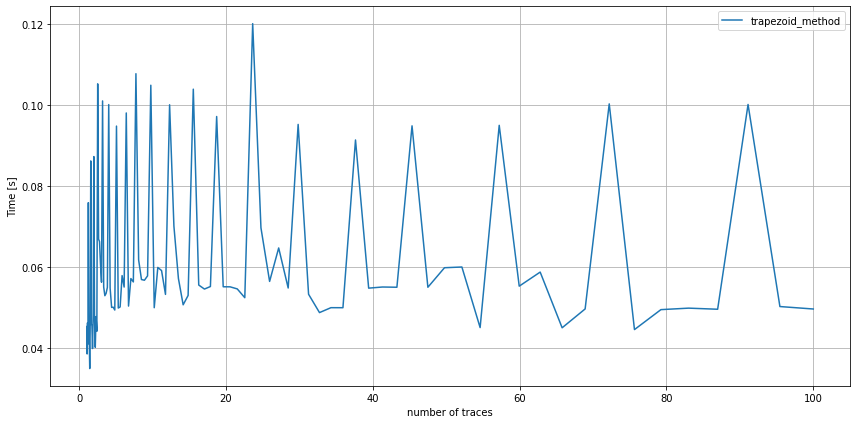

In [12]:
list_of_times = []
list_of_fraction = [x for x in np.logspace(-2, 0, 100) if x > 0.01]
for frac in list_of_fraction:
    t = TrapezoidMethod(generated_logs[generated_logs['case_id'].isin(pd.Series(generated_logs['case_id'].unique()).sample(frac=frac, random_state=0))])
    start_time = time.time()
    t.core_metod('A', 'B')
    execution_time = time.time() - start_time
    print("\r{} %".format(round(100 * list_of_fraction.index(frac)/len(list_of_fraction)),2), end='')
    list_of_times.append(execution_time)
n_task = t.number_of_traces['A']
print('\r       ', end='')
_, ax = plt.subplots(nrows=1, ncols=1, figsize=[12,6])
ax.plot([n_task * _ for _ in list_of_fraction], list_of_times, label='trapezoid_method')
ax.set(xlabel='number of traces', ylabel='Time [s]')
ax.grid()
plt.legend()
plt.tight_layout()
plt.show()

In [13]:
df_reviewing = pd.read_csv('logs/reviewing.csv')
df_reviewing['start_timestamp'] = pd.to_datetime(df_reviewing['Start Timestamp'])
df_reviewing['complete_timestamp'] = pd.to_datetime(df_reviewing['Complete Timestamp'])
df_reviewing.head()

,Case ID,Activity,Resource,Start Timestamp,Complete Timestamp,Variant,Variant index,(case) description,Result by Reviewer A,Result by Reviewer B,Result by Reviewer C,Result by Reviewer X,accepts,lifecycle:transition,rejects,start_timestamp,complete_timestamp
0,1,invite reviewers,Mike,2006-01-01 00:00:00.000,2006-01-06 00:00:00.000,Variant 5,5,Simulated process instance,NaN,NaN,NaN,NaN,NaN,complete,NaN,2006-01-01,2006-01-06
1,1,get review 2,Carol,2006-01-09 00:00:00.000,2006-01-09 00:00:00.000,Variant 5,5,Simulated process instance,NaN,reject,NaN,NaN,NaN,complete,NaN,2006-01-09,2006-01-09
2,1,get review 3,Pam,2006-01-10 00:00:00.000,2006-01-10 00:00:00.000,Variant 5,5,Simulated process instance,NaN,NaN,reject,NaN,NaN,complete,NaN,2006-01-10,2006-01-10
3,1,get review 1,John,2006-01-11 00:00:00.000,2006-01-11 00:00:00.000,Variant 5,5,Simulated process instance,reject,NaN,NaN,NaN,NaN,complete,NaN,2006-01-11,2006-01-11
4,1,collect reviews,Anne,2006-01-11 00:00:00.000,2006-01-13 00:00:00.000,Variant 5,5,Simulated process instance,NaN,NaN,NaN,NaN,NaN,complete,NaN,2006-01-11,2006-01-13


In [14]:
Treviewing = TrapezoidMethod(logs=df_reviewing, 
                             case_id_column_name='Case ID', 
                             task_column_name='Activity', 
                             instance_column_name='Variant')

In [15]:
Treviewing.list_of_tasks

array(['invite reviewers', 'get review 2', 'get review 3', 'get review 1',
       'collect reviews', 'decide', 'invite additional reviewer',
       'get review X', 'reject', 'time-out 1', 'time-out X', 'accept',
       'time-out 2', 'time-out 3'], dtype=object)

In [26]:
tasks = [task for task in df_reviewing[df_reviewing['Variant'] == 'Variant 5']['Activity'].unique() if task not in ['get review 2', 'get review 3','get review 1']]
print(tasks)
for i in range(len(tasks)):
    for j in range(i + 1, len(tasks)):
        print('possible relations: ', Treviewing.core_metod(first_task=tasks[i],
                                                            second_task=tasks[j],
#                                                             instance='Variant 5',
#                                                             plot_results=True,
#                                                             plot_steps=True,
                                                            is_big_dataframe=True,
                                                            print_results=True))

['invite reviewers', 'collect reviews', 'decide', 'invite additional reviewer', 'get review X', 'reject']
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
invite reviewers area: 46542.48 
collect reviews area: 152007.85 
splot area: 0.0 

splot/task1: 0 % 
splot/task2: 0 % 

possible relations:  ['meets', 'before']
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
invite reviewers area: 1844.05 
decide area: 1683001.12 
splot area: 0.0 

splot/task1: 0 % 
splot/task2: 0 % 

possible relations:  ['meets', 'before']
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
invite reviewers area: 1907.41 
invite additional reviewer area: 1350917.3 
splot area: 0.0 

splot/task1: 0 % 
splot/task2: 0 % 

possible relations:  ['meets', 'before']
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
invite reviewers area: 1876.31 
get review 